# PROJECT

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


In [2]:
customer_churn=pd.read_csv("E:/excel/customer_churn.csv")
customer_churn.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#Data Manipulation

In [4]:
customer_5=pd.DataFrame(customer_churn.iloc[:,5])

In [5]:
customer_15=pd.DataFrame(customer_churn.iloc[:,15])

In [6]:
senior_male_electronic=customer_churn[(customer_churn["gender"]=="Male") & (customer_churn["SeniorCitizen"]==1) & (customer_churn["PaymentMethod"]=="Mailed check")]

In [7]:
customer_total_tenure=customer_churn[(customer_churn["tenure"]>70) | (customer_churn["MonthlyCharges"]>100)]

In [8]:
two_mail_yes=customer_churn[(customer_churn["Contract"]=="Two year") & (customer_churn["Churn"]=="Yes") & (customer_churn["PaymentMethod"]=="Electronic check")]

In [9]:
customer_333=customer_churn.sample(333)

In [10]:
customer_churn["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
#Data Visualization

In [12]:
p=customer_churn["InternetService"].value_counts().to_list()
p

[3096, 2421, 1526]

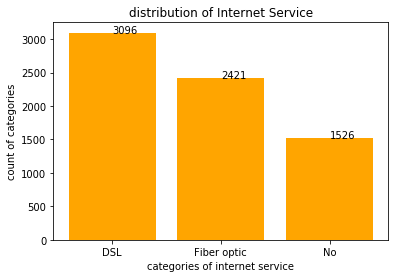

In [13]:
plt.bar(customer_churn["InternetService"].unique(),p,color="orange")
plt.xlabel("categories of internet service")
plt.ylabel("count of categories")
plt.title("distribution of Internet Service")
for index, values in enumerate(p):
    plt.text(x=index,y=values,s=str(values))

Text(0.5, 1.0, 'Distribution of tenure')

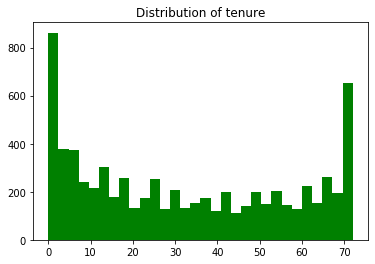

In [14]:
plt.hist(customer_churn["tenure"],color="green",bins=30)
plt.title("Distribution of tenure")

Text(0.5, 1.0, 'tenure vs MonthlyCharges')

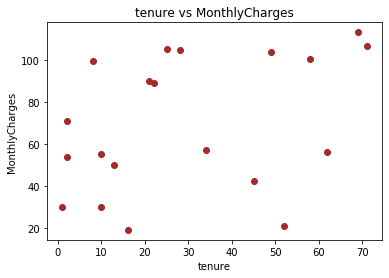

In [15]:
plt.scatter(customer_churn["tenure"].head(20),customer_churn["MonthlyCharges"].head(20),color="brown")
plt.xlabel("tenure")
plt.ylabel("MonthlyCharges")
plt.title("tenure vs MonthlyCharges")

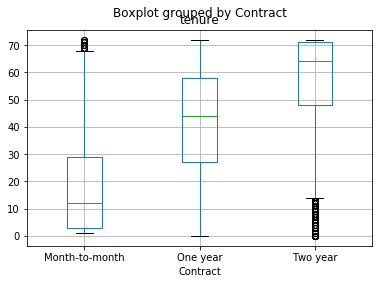

In [16]:
customer_churn.boxplot("tenure","Contract")

In [17]:
#Linear Regression

In [18]:
target=pd.DataFrame(customer_churn["MonthlyCharges"])
x=pd.DataFrame(customer_churn["tenure"])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,target,train_size=.7,random_state=43)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predicted=lr.predict(x_test)
lr.score(x_test,y_test)

0.06608054173446964

In [20]:
df=pd.DataFrame(y_test).reset_index()
dp=pd.DataFrame(y_predicted)

In [21]:
error=y_test-y_predicted

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mse=mean_squared_error(y_predicted,y_test)

In [26]:
rmse=np.sqrt(mse)

In [27]:
rmse

29.106735055471685

In [28]:
#Logistic Regression

In [55]:
target=customer_churn["Churn"]
x=pd.DataFrame(customer_churn.loc[:,['MonthlyCharges','tenure']])
y=pd.DataFrame(customer_churn["MonthlyCharges"])


In [56]:
x_train,x_test,y_train,y_test=train_test_split(y,target,train_size=.65,random_state=43)
log=LogisticRegression()
log.fit(x_train,y_train)
y_predicted=lr.predict(x_test)
lr.score(x_test,y_test)
print(confusion_matrix(y_test, y_predicted))  
print(classification_report(y_test, y_predicted))  

[[1817    0]
 [ 649    0]]
              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1817
         Yes       0.00      0.00      0.00       649

    accuracy                           0.74      2466
   macro avg       0.37      0.50      0.42      2466
weighted avg       0.54      0.74      0.63      2466



C:\Users\ROHIT KHARAT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,target,train_size=.65,random_state=43)
log=LogisticRegression()
log.fit(x_train,y_train)
y_predicted=log.predict(x_test)
log.score(x_test,y_test)

0.7879156528791565

In [58]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_predicted))  
print(classification_report(y_test, y_predicted))  

[[1652  165]
 [ 358  291]]
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1817
         Yes       0.64      0.45      0.53       649

    accuracy                           0.79      2466
   macro avg       0.73      0.68      0.70      2466
weighted avg       0.77      0.79      0.77      2466



In [59]:
#DEcision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
target=pd.DataFrame(customer_churn["Churn"])
x=pd.DataFrame(customer_churn["tenure"])

In [68]:
x_train,x_test,y_train,y_test=train_test_split(y,target,train_size=.8,random_state=83)
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
y_predicted=tree.predict(x_test)
tree.score(x_test,y_test)

0.6919801277501775

In [69]:
confusion_matrix(y_test,y_predicted)

array([[890, 132],
       [302,  85]], dtype=int64)

In [70]:
classification_report(y_test,y_predicted)

'              precision    recall  f1-score   support\n\n          No       0.75      0.87      0.80      1022\n         Yes       0.39      0.22      0.28       387\n\n    accuracy                           0.69      1409\n   macro avg       0.57      0.55      0.54      1409\nweighted avg       0.65      0.69      0.66      1409\n'

In [71]:
#Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
target=pd.DataFrame(customer_churn["Churn"])
x=pd.DataFrame(customer_churn[["tenure","MonthlyCharges"]])

In [76]:
x_train,x_test,y_train,y_test=train_test_split(y,target,train_size=.8,random_state=83)
forest=RandomForestClassifier()
forest.fit(x_train,y_train)
y_predicted=forest.predict(x_test)
forest.score(x_test,y_test)

C:\Users\ROHIT KHARAT\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6784953867991483

In [81]:
print(confusion_matrix(y_test,y_predicted))

print(classification_report(y_test,y_predicted))

[[858 164]
 [289  98]]
              precision    recall  f1-score   support

          No       0.75      0.84      0.79      1022
         Yes       0.37      0.25      0.30       387

    accuracy                           0.68      1409
   macro avg       0.56      0.55      0.55      1409
weighted avg       0.65      0.68      0.66      1409

